<a href="https://colab.research.google.com/github/kdkd9/Hospital-Length-of-Stay-prediction/blob/main/Hospital_LOS_using_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install numba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 6.5 MB/s eta 0:00:00


In [4]:
import numba

In [5]:
numba.__version__

'0.56.4'

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
import statsmodels.api as sm
warnings.filterwarnings("ignore")

In [7]:
np.__version__

'1.22.4'

In [10]:
import shap

In [11]:
#for buildig a model
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor
from sklearn.preprocessing import LabelEncoder



In [12]:
#for tuning the model
from sklearn.model_selection import GridSearchCV

# To check model performance
from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error

In [15]:
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
data=pd.read_csv('/content/drive/MyDrive/LengthOfStay 2.csv')

In [20]:
# copying data to another variable to avoid any changes to original data
original_data = data.copy()

In [21]:
data.head()

,eid,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,fibrosisandother,malnutrition,hemo,hematocrit,neutrophils,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid,lengthofstay
0,1,8/29/2012,0,F,0,0,0,0,0,0,0,0,0,0,0,11.5,14.20,140.361132,192.476918,12.0,1.390722,30.432418,96,6.5,4,9/1/2012,B,3
1,2,5/26/2012,5+,F,0,0,0,0,0,0,0,0,0,0,0,9.0,4.10,136.731692,94.078507,8.0,0.943164,28.460516,61,6.5,1,6/2/2012,A,7
2,3,9/22/2012,1,F,0,0,0,0,0,0,0,0,0,0,0,8.4,8.90,133.058514,130.530524,12.0,1.065750,28.843812,64,6.5,2,9/25/2012,B,3
3,4,8/9/2012,0,F,0,0,0,0,0,0,0,0,0,0,0,11.9,9.40,138.994023,163.377028,12.0,0.906862,27.959007,76,6.5,1,8/10/2012,A,1
4,5,12/20/2012,0,F,0,0,0,1,0,1,0,0,0,0,0,9.1,9.05,138.634836,94.886654,11.5,1.242854,30.258927,67,5.6,2,12/24/2012,E,4


In [22]:
data.shape

(100000, 28)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   eid                         100000 non-null  int64  
 1   vdate                       100000 non-null  object 
 2   rcount                      100000 non-null  object 
 3   gender                      100000 non-null  object 
 4   dialysisrenalendstage       100000 non-null  int64  
 5   asthma                      100000 non-null  int64  
 6   irondef                     100000 non-null  int64  
 7   pneum                       100000 non-null  int64  
 8   substancedependence         100000 non-null  int64  
 9   psychologicaldisordermajor  100000 non-null  int64  
 10  depress                     100000 non-null  int64  
 11  psychother                  100000 non-null  int64  
 12  fibrosisandother            100000 non-null  int64  
 13  malnutrition   

1. vdate(visit date), rcount (readmission count), gender, discharged(date of discharge) and facid(facility id at which encounter occured) have "object" datatype. All the other columns have numerical datatypes. 
2. The number of non-null values is the same as the total number of entries in the data i.e. there are no null values.

In [24]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
eid,100000.0,50000.500000,28867.657797,1.000000,25000.750000,50000.500000,75000.250000,100000.000000
dialysisrenalendstage,100000.0,0.036420,0.187334,0.000000,0.000000,0.000000,0.000000,1.000000
asthma,100000.0,0.035270,0.184462,0.000000,0.000000,0.000000,0.000000,1.000000
irondef,100000.0,0.094940,0.293134,0.000000,0.000000,0.000000,0.000000,1.000000
pneum,100000.0,0.039450,0.194664,0.000000,0.000000,0.000000,0.000000,1.000000
substancedependence,100000.0,0.063060,0.243072,0.000000,0.000000,0.000000,0.000000,1.000000
psychologicaldisordermajor,100000.0,0.239040,0.426499,0.000000,0.000000,0.000000,0.000000,1.000000
depress,100000.0,0.051660,0.221341,0.000000,0.000000,0.000000,0.000000,1.000000
psychother,100000.0,0.049390,0.216682,0.000000,0.000000,0.000000,0.000000,1.000000
fibrosisandother,100000.0,0.004790,0.069044,0.000000,0.000000,0.000000,0.000000,1.000000


Pt's length of stay ranges from 1 to 17 days with the mean of 4 days.

In [25]:
# checking for duplicate values in the Data
data.duplicated().sum()

0

Data does not have any duplicate rows. All raws are unique. 

We will be dropping eid column as it is jsut a serial number and will not add any value in prediction. vdate (admission date) and discharged (discharge date) can be dropped because we already have a column that reflects length of stay. 

In [26]:
data= data.drop(columns=["eid","vdate","discharged"])

In [27]:
data.head()

,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,fibrosisandother,malnutrition,hemo,hematocrit,neutrophils,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,facid,lengthofstay
0,0,F,0,0,0,0,0,0,0,0,0,0,0,11.5,14.20,140.361132,192.476918,12.0,1.390722,30.432418,96,6.5,4,B,3
1,5+,F,0,0,0,0,0,0,0,0,0,0,0,9.0,4.10,136.731692,94.078507,8.0,0.943164,28.460516,61,6.5,1,A,7
2,1,F,0,0,0,0,0,0,0,0,0,0,0,8.4,8.90,133.058514,130.530524,12.0,1.065750,28.843812,64,6.5,2,B,3
3,0,F,0,0,0,0,0,0,0,0,0,0,0,11.9,9.40,138.994023,163.377028,12.0,0.906862,27.959007,76,6.5,1,A,1
4,0,F,0,0,0,1,0,1,0,0,0,0,0,9.1,9.05,138.634836,94.886654,11.5,1.242854,30.258927,67,5.6,2,E,4


In [28]:
data.isnull().sum().sum()

0

In [29]:
data['rcount'].value_counts()

0     55031
1     15007
2      9987
3      8047
4      6941
5+     4987
Name: rcount, dtype: int64

In [30]:
data['rcount']=data['rcount'].str.replace('+','')
data['rcount']=data['rcount'].astype(int)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   rcount                      100000 non-null  int64  
 1   gender                      100000 non-null  object 
 2   dialysisrenalendstage       100000 non-null  int64  
 3   asthma                      100000 non-null  int64  
 4   irondef                     100000 non-null  int64  
 5   pneum                       100000 non-null  int64  
 6   substancedependence         100000 non-null  int64  
 7   psychologicaldisordermajor  100000 non-null  int64  
 8   depress                     100000 non-null  int64  
 9   psychother                  100000 non-null  int64  
 10  fibrosisandother            100000 non-null  int64  
 11  malnutrition                100000 non-null  int64  
 12  hemo                        100000 non-null  int64  
 13  hematocrit     

In [32]:
# Making list of all categorical variables:
cat_col = ['gender','facid']

#Printing the number of occurances of each unique value in each categorical column
for column in cat_col:
    print(data[column].value_counts())

F    57643
M    42357
Name: gender, dtype: int64
E    30755
A    30035
B    30012
C     4699
D     4499
Name: facid, dtype: int64


# Exploratory Data Analysis

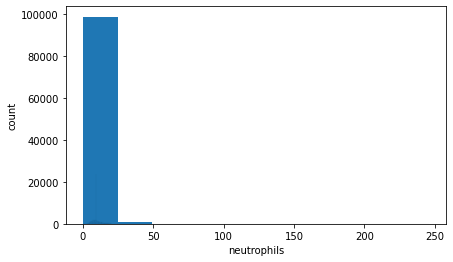

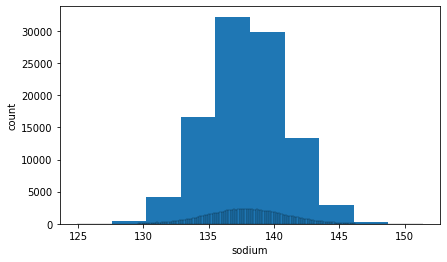

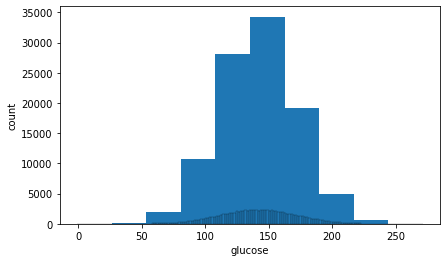

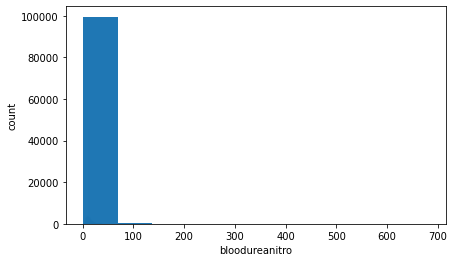

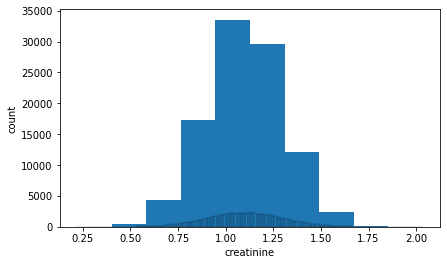

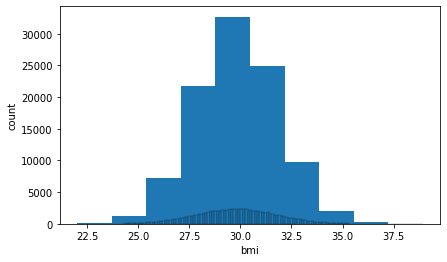

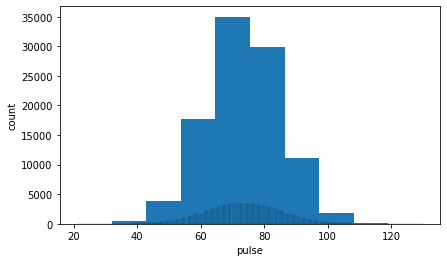

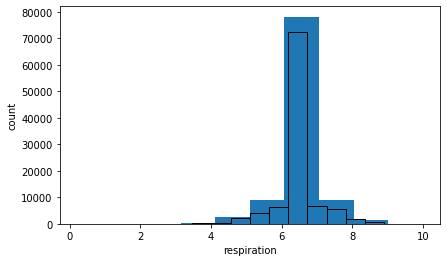

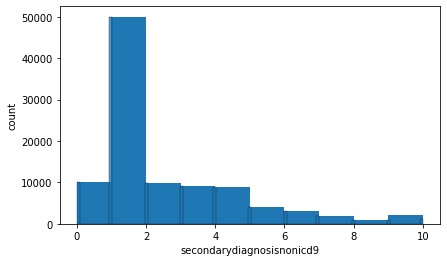

In [33]:
for col in data.columns[14:23]:
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    sns.histplot(x=data[col])
    plt.show

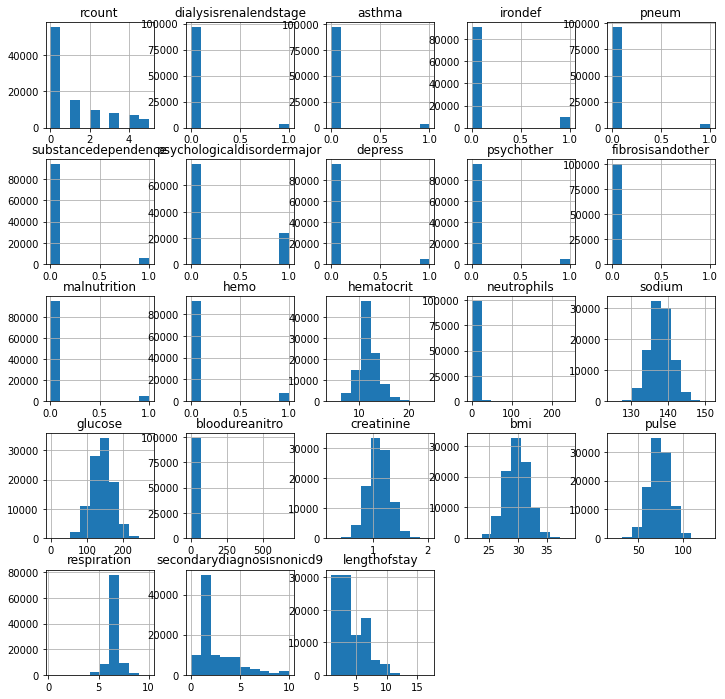

In [34]:
data.hist(figsize=(12,12))
plt.show()

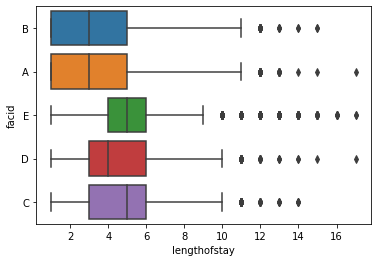

In [35]:
sns.boxplot(y="facid", x="lengthofstay", data=data)
plt.show()

Facility C, D and E have higher average length of stay compared to facility A and B. For all the facilities, stay beyond 10 days seems to be an outlier. 

In [36]:
def histogram(data, feature, figsize=(12,7), kde=False, bins=None):
    sns.histplot(
        data=data, x=feature, color="violet"
    )

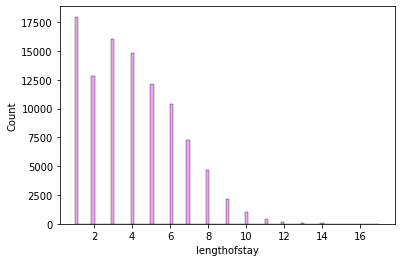

In [37]:
histogram(data, "lengthofstay", kde=True, bins=30)

In [38]:
def joint(data, x, y, figsize=(12,7), kde=False, bins=None):
    sns.jointplot(
        data=data, x=x, y=y, color="violet"
    )

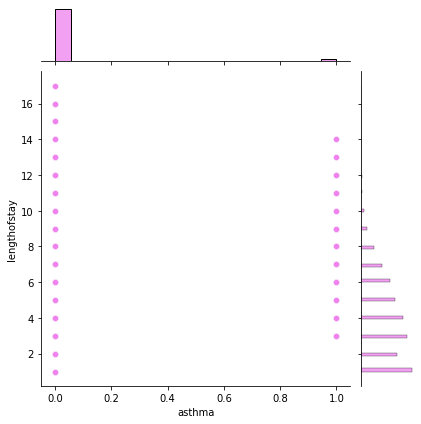

In [39]:
joint(data, "asthma", "lengthofstay")

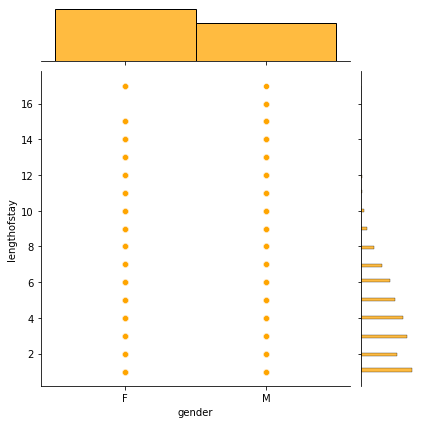

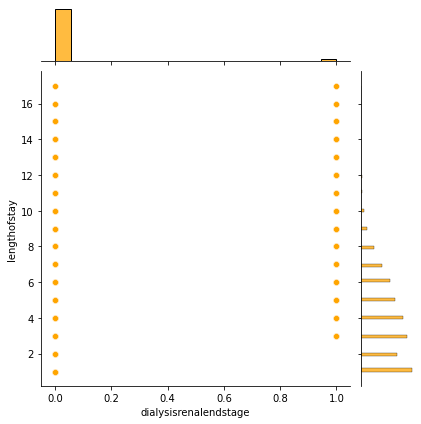

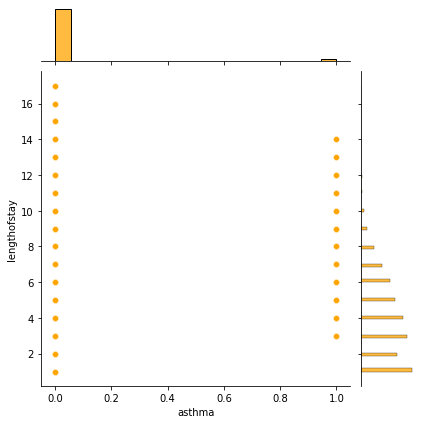

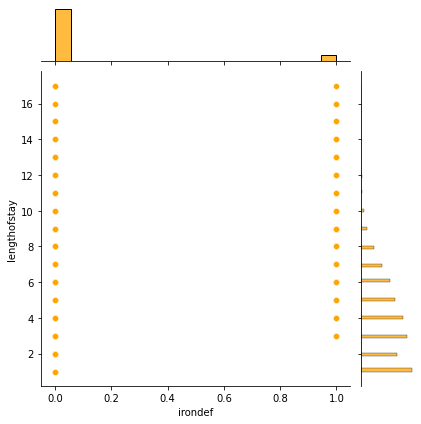

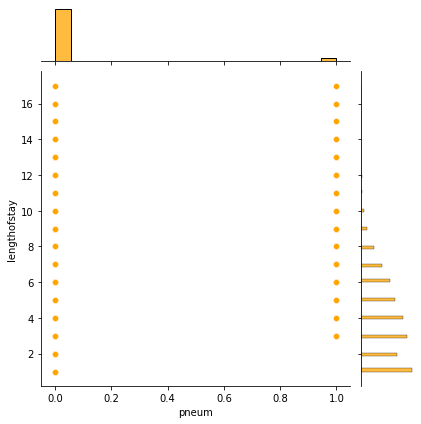

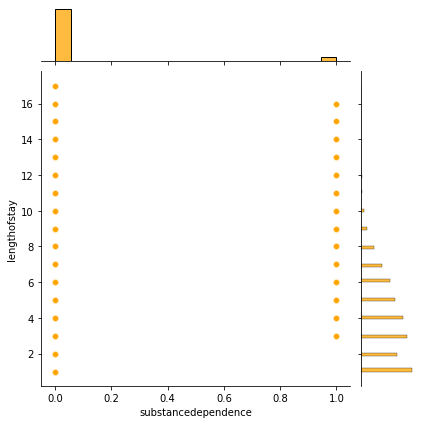

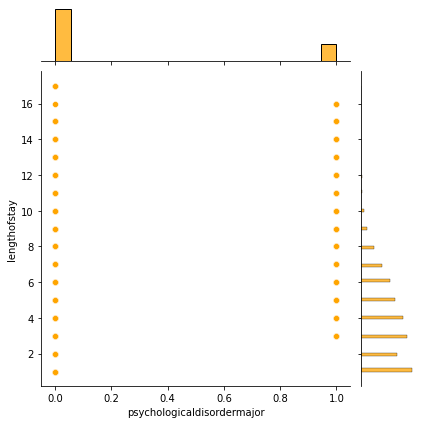

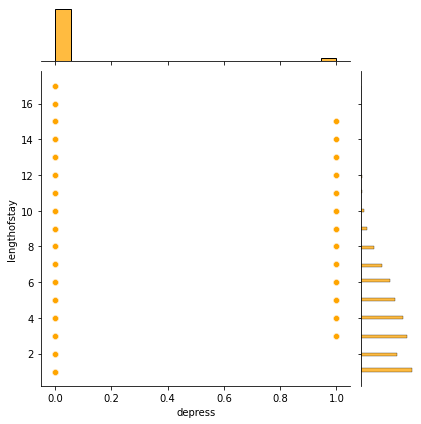

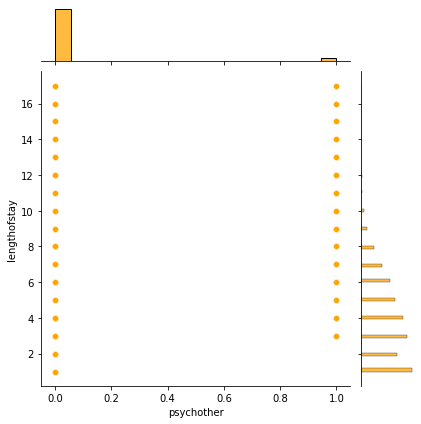

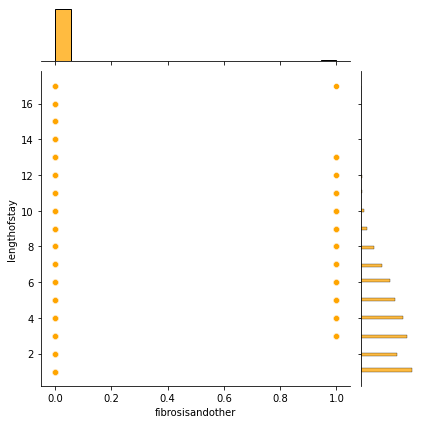

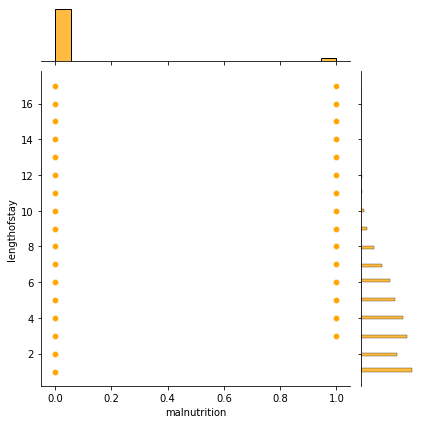

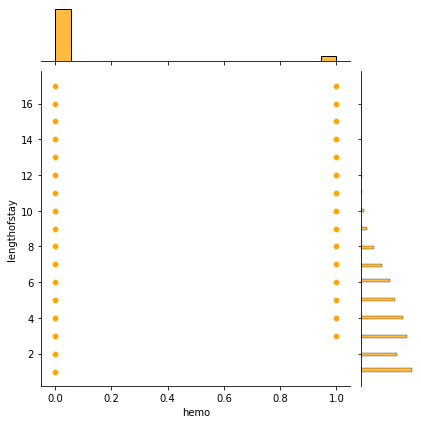

In [40]:
for column in data.columns[1:13]:
    sns.jointplot(x=data[column], y="lengthofstay", data=data, color = "Orange")
    plt.show

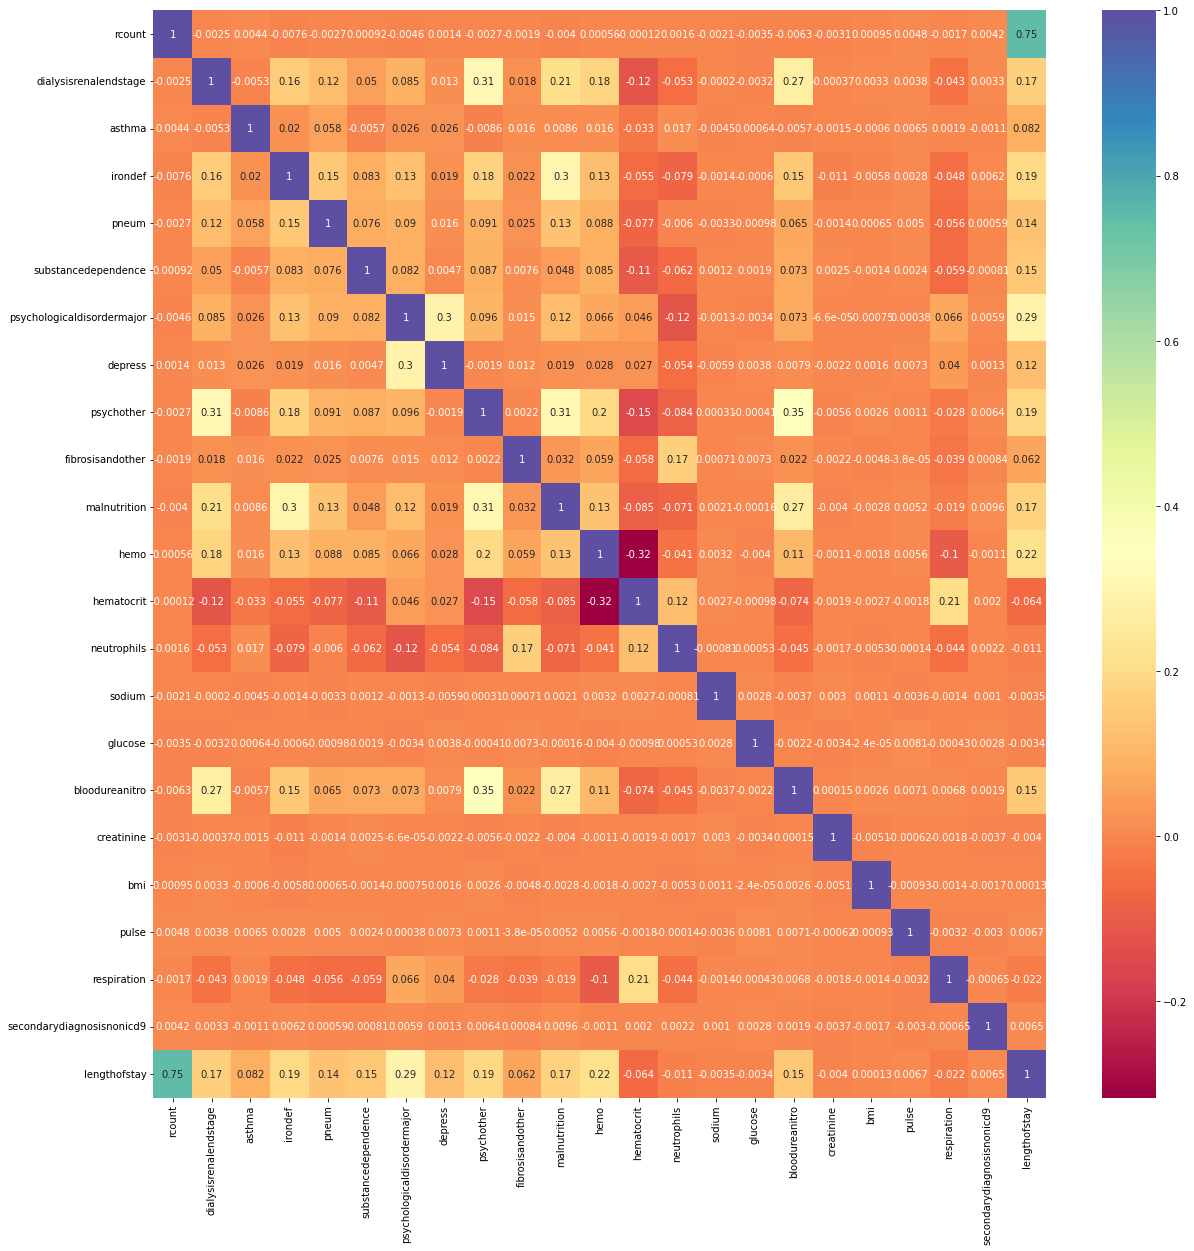

In [41]:
#Checking correlation between differnet variable and class with heatmap

plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot = True, cmap="Spectral")
plt.show()

readmission count has high correlation (0.75) with the length of stay. 

# Data preparation for model building

In [42]:
#Creating dummy variables for the categorical columns

df=pd.get_dummies(
    data, columns=data.select_dtypes(include=["object"]).columns.tolist(), 
    drop_first=True,
)

In [43]:
df

,rcount,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,fibrosisandother,malnutrition,hemo,hematocrit,neutrophils,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,lengthofstay,gender_M,facid_B,facid_C,facid_D,facid_E
0,0,0,0,0,0,0,0,0,0,0,0,0,11.5,14.20,140.361132,192.476918,12.0,1.390722,30.432418,96,6.5,4,3,0,1,0,0,0
1,5,0,0,0,0,0,0,0,0,0,0,0,9.0,4.10,136.731692,94.078507,8.0,0.943164,28.460516,61,6.5,1,7,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,8.4,8.90,133.058514,130.530524,12.0,1.065750,28.843812,64,6.5,2,3,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,11.9,9.40,138.994023,163.377028,12.0,0.906862,27.959007,76,6.5,1,1,0,0,0,0,0
4,0,0,0,0,1,0,1,0,0,0,0,0,9.1,9.05,138.634836,94.886654,11.5,1.242854,30.258927,67,5.6,2,4,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3,0,0,0,0,0,0,0,0,0,0,0,12.0,9.30,132.614977,171.422555,12.0,0.650323,30.063069,80,6.5,1,6,1,1,0,0,0
99996,0,0,0,0,0,0,0,0,0,0,0,0,12.0,9.30,138.327320,122.342450,12.0,1.521424,28.969548,61,6.5,1,1,1,1,0,0,0
99997,1,0,0,1,0,0,0,0,0,0,0,0,16.0,7.70,136.695905,108.288106,12.0,1.025677,26.354919,61,6.9,1,4,1,0,1,0,0
99998,0,0,0,0,0,0,0,1,0,0,0,0,14.3,8.20,135.980516,111.750731,16.0,1.035400,29.193462,59,5.6,1,4,1,1,0,0,0


In [44]:
#Separating independent variables and the target variable
x=df.drop('lengthofstay',axis=1)

y=df['lengthofstay'] 

# Add the intercept term
x = sm.add_constant(x)

# Model Building 

In [45]:
#Splitting the dataset into train and test(80:20)
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, shuffle=True, random_state=1)

In [46]:
#Checking the shape of the train and test data
print("Shape of training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)


Shape of training set :  (80000, 28)
Shape of test set :  (20000, 28)


Checking for multicolinearity

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Functions to check VIF
def checking_vif(train):
    vif=pd.DataFrame()
    vif["features"]=train.columns
    
    #Calculating vif for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif.round(1)

print(checking_vif(x_train))

                      features     VIF
0                        const  2599.7
1                       rcount     1.0
2        dialysisrenalendstage     1.2
3                       asthma     1.5
4                      irondef     1.5
5                        pneum     1.3
6          substancedependence     1.4
7   psychologicaldisordermajor     3.2
8                      depress     1.1
9                   psychother     1.5
10            fibrosisandother     1.1
11                malnutrition     1.3
12                        hemo     1.2
13                  hematocrit     1.3
14                 neutrophils     1.1
15                      sodium     1.0
16                     glucose     1.0
17              bloodureanitro     1.2
18                  creatinine     1.0
19                         bmi     1.0
20                       pulse     1.0
21                 respiration     1.1
22   secondarydiagnosisnonicd9     1.0
23                    gender_M     1.2
24                     fa

There is no significant multicolinearity present among the variables in the training dataset. 

Creating a linear regression model using OLS form statsmodel

In [48]:
model1=sm.OLS(y_train, x_train).fit()

In [49]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lengthofstay   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     9458.
Date:                Fri, 03 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:51:54   Log-Likelihood:            -1.2501e+05
No. Observations:               80000   AIC:                         2.501e+05
Df Residuals:                   79972   BIC:                         2.503e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          1.7789      0.208      8.546      0.000       1.371       2.187
rcount                         1.1503      0.003    434.803      0.000       1.145       1.156
dialysisrenalendstage          0.7243      0.024     30.467      0.000       0.678       0.771
asthma                         0.3542      0.027     13.231      0.000       0.302       0.407
irondef                        0.3400      0.017     19.887      0.000       0.307       0.374
pneum                          0.4430      0.024     18.404      0.000       0.396       0.490
substancedependence            0.6084      0.020     30.987      0.000       0.570       0.647
psychologicaldisordermajor     0.7913      0.017     46.121      0.000       0.758       0.825
depress                        0.3709      0.020     18.933      0.000       0.332       0.409
psychother                     0.6082      0.023     26.207      0.000       0.563       0.654
fibrosisandother               0.8483      0.062     13.692      0.000       0.727       0.970
malnutrition                   0.3267      0.021     15.385      0.000       0.285       0.368
hemo                           1.2202      0.016     75.043      0.000       1.188       1.252
hematocrit                     0.0093      0.002      4.075      0.000       0.005       0.014
neutrophils                    0.0233      0.001     28.512      0.000       0.022       0.025
sodium                        -0.0010      0.001     -0.713      0.476      -0.004       0.002
glucose                     2.726e-05      0.000      0.201      0.841      -0.000       0.000
bloodureanitro                 0.0079      0.000     22.175      0.000       0.007       0.009
creatinine                    -0.0020      0.020     -0.100      0.921      -0.042       0.038
bmi                           -0.0006      0.002     -0.317      0.751      -0.005       0.003
pulse                       6.514e-05      0.000      0.186      0.853      -0.001       0.001
respiration                   -0.0340      0.007     -4.601      0.000      -0.048      -0.020
secondarydiagnosisnonicd9     -0.0010      0.002     -0.477      0.633      -0.005       0.003
gender_M                       0.0676      0.009      7.608      0.000       0.050       0.085
facid_B                        0.0012      0.011      0.113      0.910      -0.019       0.022
facid_C                        1.1035      0.024     45.973      0.000       1.056       1.150
facid_D                        0.9342      0.027     34.246      0.000       0.881       0.988
facid_E                        0.7766      0.019     41.094      0.000       0.740       0.814
==============================================================================
Omnibus:                    21370.339   Durbin-Watson:     

R2 and adjR2 values are around 76%. 

We can try to drop the features that has p value < 0.005 such as glucose, creatinine, pulse, sodium, bmi and secondarydiagnosisnonicd9 to see if that can improve the statistical performance of the model. However, these features are clinically important to assess patient conditions/illness and will definitely affect the outcome (i.e. length of stay). Hence, they should not be dropped in the real world scenario.

# Building a random forest model

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
# create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0, oob_score=True)

In [54]:
model2=regressor.fit(x_train, y_train)
print(model2.oob_score_)


0.9211259370582697


Checking model performance

In [55]:
# Check the performance of the previous (model1)

#RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets-predictions)**2).mean())

#MAPE

def mape (predictions, targets):
    return np.mean(np.abs((targets-predictions))/targets)*100

#MAE

def mae(predictions, targets):
    return np.mean(np.abs((targets-predictions)))

#model performance on test and train data

def model_perf(olsmodel, x_train, x_test, y_train, y_test):
    
    #insample prediction
    y_pred_train=olsmodel.predict(x_train)
    y_observed_train=y_train

    #prediction on the test data
    y_pred_test=olsmodel.predict(x_test)
    y_observed_test=y_test
    
    print(
        pd.DataFrame(
        {
            "Data":["Train","Test"],
            "RMSE":[
                rmse(y_pred_train, y_observed_train),
                rmse(y_pred_test, y_observed_test),
            ],
            "MAE":[
                mae(y_pred_train, y_observed_train),
                mae(y_pred_test, y_observed_test),
            ],
            "MAPE":[
                mape(y_pred_train, y_observed_train),
                mape(y_pred_test, y_observed_test),
            ]
        }))
    
    
    
    

In [58]:
#Checking model1 performance
model_perf(model1, x_train, x_test, y_train, y_test)

    Data      RMSE       MAE       MAPE
0  Train  1.154532  0.875978  32.489598
1   Test  1.138636  0.869620  32.215115


In [59]:
#Checking model2 performance
model_perf(model2, x_train, x_test, y_train, y_test)

    Data      RMSE       MAE       MAPE
0  Train  0.246086  0.146725   4.025204
1   Test  0.649346  0.390082  10.632463


**Model explainability**

Computing SHAP values

In [ ]:
explainer = shap.Explainer(model1.predict, x_train)

shap_values=explainer(x_train)

Permutation explainer:  65%|██████▍   | 51922/80000 [25:02<14:49, 31.58it/s]

Plotting summary plot of SHAP values

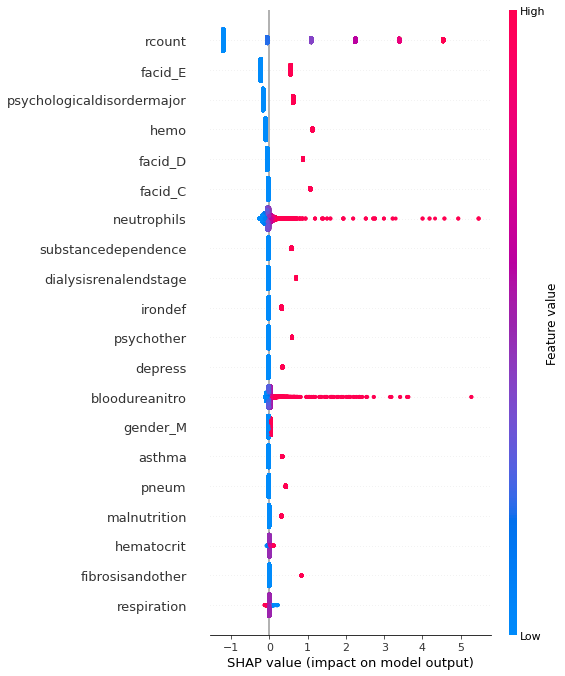

In [66]:
shap.summary_plot(shap_values, x_train)